In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# print("hello world")

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


2.16.1


In [2]:
# shows number of images, with each images as 28 x 28 pixels
train_images.shape

(60000, 28, 28)

In [3]:
# number of labels
len(train_labels)

60000

In [4]:
# range of the labels
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
# shows the dimension of the test data
test_images.shape

(10000, 28, 28)

In [6]:
# number of image labels in test data
len(test_labels)

10000

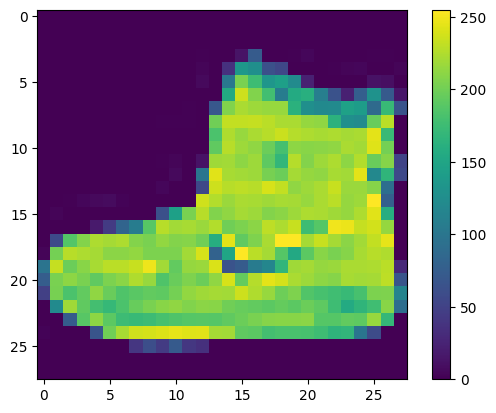

In [7]:
# shows a graph of pixel values in the range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# scale down the range from 0 to 1 to improve convergence (optimization purposes)
train_images = train_images / 255.0

test_images = test_images / 255.0

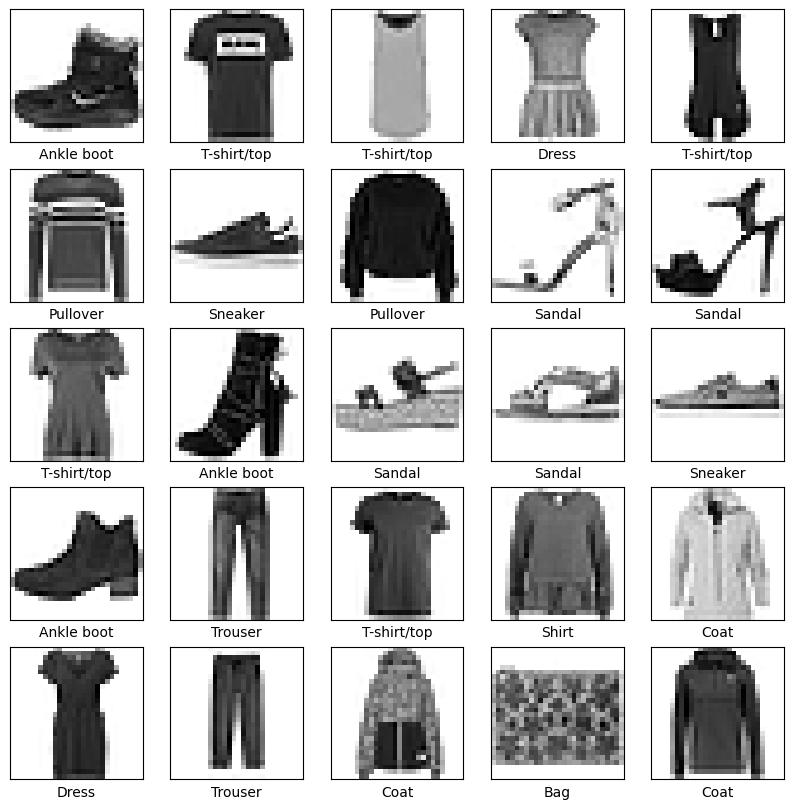

In [9]:
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) #shows in grayscale
    # plt.imshow(train_images[i]) color scale option
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
# configure layers of model, then compile it

# getting the layers (extract representations from the data fed into them)

model = tf.keras.Sequential([
    # this transforms format of img from 2D to 1D
    # think of it as unstackingg the rows of pixels and lining them up
    # for reformatting purposes
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # The first layer processes the input data and extracts features
    tf.keras.layers.Dense(128, activation='relu'),
    # the second layer produces the final output logits
    # output the likelihood of the input image belonging to each class (referring to the 0 to 9s from before).
    tf.keras.layers.Dense(10)
])

c:\Users\MacCh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# compiling the model
# optimizer keeps the model updated and has access to the loss function
# loss function is a measure of how accurate the model is during training
# metrics is used to monitor the training and test steps (are the img correctly classified?)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# start training, feed data
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7797 - loss: 0.6365
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8649 - loss: 0.3786
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8746 - loss: 0.3456
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8879 - loss: 0.3098
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8919 - loss: 0.2925
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8964 - loss: 0.2794
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9013 - loss: 0.2666
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9066 - loss: 0.2511
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9079 - loss: 0.2455
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9113 - loss: 0.2350


In [13]:
# comparing model performance on test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# overfitting happens when test data is less accurate than the training one
# likely due to it memorizing the details of the training data to extent
# that its performance degrades on a new unseen data

313/313 - 0s - 958us/step - accuracy: 0.8674 - loss: 0.3776

Test accuracy: 0.8673999905586243


In [14]:
# converting logits to probabilities
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
# making predications to the images
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


In [16]:
# array of 10 numbers, represent the model's confidence that each img
# corresponds to each of the 10 different types of clothing
predictions[0]

array([9.8254814e-06, 1.5730867e-09, 1.1072793e-06, 2.3887463e-08,
       1.3991817e-07, 4.0550586e-03, 1.9562192e-05, 1.6257850e-02,
       7.5000338e-07, 9.7965562e-01], dtype=float32)

In [17]:
# see which label has the highest confidence value
np.argmax(predictions[0])

9

In [18]:
# graph full set of 10 classes of predications
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

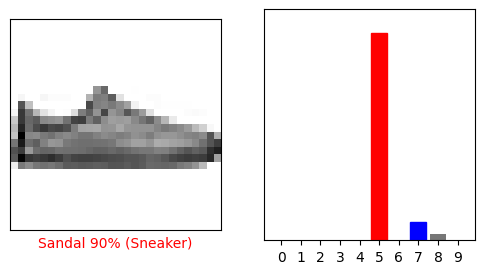

In [19]:
# prediction of the 12th image (bad accuracy)
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

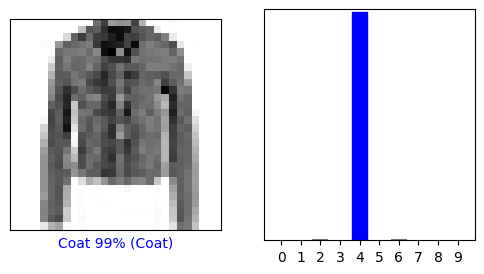

In [20]:
# prediction of the 12th image (good accuracy)
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

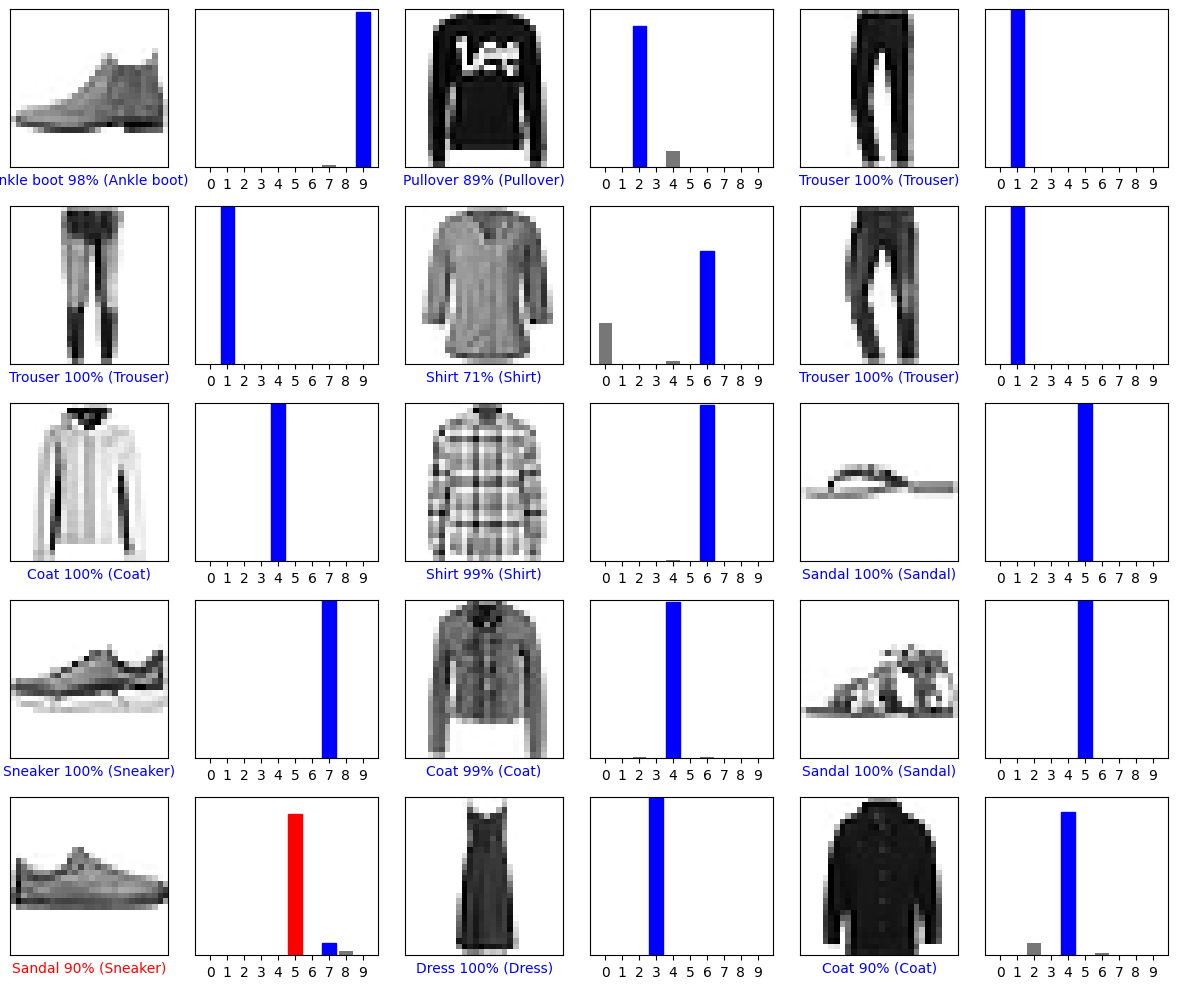

In [21]:
# plot predictions of 15 clothing
# results change every time it runs on a new try

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()